数据来源 [国家卫生健康委员会](http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml)

1月

日期 | 10日 | 11日| 12日 | 13日| 14日 | 15日| 16日 | 17日| 18日| 19日 | 20日| 21日 | 22日 | 23日 | 24日| 25日 | 26日| 27日 | 28日| 29日 | 30日| 31日
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-:| :-: |:-: |:-: 
确诊| 41 | 41 | 41 | 41 | 41 | 41 | 45 | 62 | 121 | 198 | 291 | 440 | 571 | 830 | 1287| 1975| 2744| 4515| 5974 | 7711 | 9692| 11791 |
重症|  7 |  7 |  6 |  6 | 6  | 5  |  5 |  8 |  -  |  35 | -   | 102 | 95  | 177 | 237 | 324 | 461 | 976 | 1239 | 1370 | 1527| 1795|
死亡|  1 |  1 |  1 |  1 | 1  | 2  |  2 |  2 |  -  |   3 | -   | 9   | 17  | 25  | 41  | 56  | 80  | 106 | 132  | 170| 213| 259 |
治愈|  2 |  6 |  7 |  7 | 7  | 12 | 15 | 19 | 24  |  25 | -   | -   | -   | -   | 38  | 49  | 51  |  60 | 103  | 124 | 171| 243|
疑似|  - |  - |  - |  - |  - |  - |  - |  - |  -  |   - |11+43|?+37 | 393 | 1072| 1965| 2684| 5794| 6973| 9239 | 12167| 15238| 17988 |
密切|739 |763 |763 |763 |763 |763 | 763| 763|  -  | 817 | 1739| 2197| 5897| 9507|15197|23431|32799|47833| 65537| 88693| 113579 | 136987 |
解除| 0  | 46 | 76 |187 |450 |644 | 665| 681|  -  | 727 | 817 | 765 | 969 | 1087|1230 | 1875| 2346| 3701| 5547 | 6746| 11152 | 18509|


2月

日期 | 1日 | 2日| 3日 | 4日| 5日 | 6日| 7日 | 8日| 9日| 10日 | 11日| 12日 | 13日 | 14日 | 15日|
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: | 
确诊| 14380 | 17205| 20438| 24324|28018 | 31161| 34546| 37198| 40171| 42638| 44653| 59804| 63851| 66492| 68500|
重症|  2110 | 2296 | 2788 |  3219| 3859 |  4821|  6101|  6188|  6484|  7333|  8204|  8030| 10204| 11053| 11272|
死亡|  304  | 361  | 425  |   490| 563  |   636|   722|   811|   908|  1016|  1113|  1367|  1380|  1523|  1665|
治愈|  328  | 475  | 632  |   892|1153  |  1540|  2050|  2649|  3281|  3996|  4740|  5911|  6723|  8096|  9419|
疑似| 19544 | 21558| 23214| 23260|24702 | 26359| 27657| 28942| 23589| 21675| 16067| 13435| 10109|  8969|  8228|
密切|163844 |189583|221015|252154|282813|314028|345498|371905|399487|428438|451462|471531|493067|513183|529418|
解除| 26250 | 36883| 49686| 66599|96459 |127983|155838|183722|211969|240710|266425|290145|315083|344144|370654|


2月

日期 | 16日 | 17日| 18日 | 19日| 20日 | 21日| 22日 | 23日| 24日| 25日 | 26日| 27日 | 28日 | 29日 |
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | 
确诊|70548 | 72436| 74185| 74576(75002)| 75465| 76288| 76936| 77150| 77658| 78064| 78497| 78824| 79251| 79824|
重症|10644 | 11741| 11977| 11864       | 11633| 11477| 10968|  9915|  9126|  8752|  8346|  7952|  7664|  7365|
死亡| 1770 |  1868|  2004|  2118       |  2236|  2345|  2442|  2592|  2663|  2715|  2744|  2788|  2835|  2870|
治愈|10844 | 12552| 14376| 16155       | 18264| 20659| 22888| 24734| 27323| 29745| 32495| 36117| 39002| 41625|
疑似| 7264 |  6242|  5248|  4922       |  5206|  5365|  4148|  3434|  2824|  2491|  2358|  2308|  1418|   851|
密切|546016|560901|574418|589163       |606037|618915|628517|635531|641742|647406|652174|656054|658587|660716|
解除|395477|419349|438537|462800       |485735|505351|522428|538050|553840|568298|580602|590829|600364|608860|


19日核减加回

3月

日期 | 1日 | 2日| 3日 | 4日| 5日 | 6日| 7日 | 8日| 9日| 10日 | 11日| 12日 | 13日 | 14日 | 15日|
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: | 
确诊| 80026| 80151| 80270| 80409| 80552| 80651| 80695| 80735| 80754| 80778| 80793| 80813| 80824| 80844| 80860|
重症|  7110|  6806|  6416|  5952|  5737|  5489|  5264|  5111|  4794|  4492|  4257|  4020|  3610|  3226|  3032|
死亡|  2912|  2943|  2981|  3012|  3042|  3070|  3097|  3119|  3136|  3158|  3169|  3176|  3189|  3199|  3213|
治愈| 33757| 47204| 49856| 52045| 53726| 55404| 57065| 58600| 59897| 61475| 62793| 64111| 65541| 66911| 67749|
疑似|   715|   587|   520|   522|   482|   502|   458|   421|   349|   285|   253|   147|   115|   113|   134|
密切|663240|664899|666397|669025|670854|672458|674038|674760|675338|675886|677243|678088|678935|679759|680462|
解除|617021|624248|629965|636155|640958|645728|650964|654614|658356|661279|663542|665927|668056|669570|670880|




日期 | 16日 | 17日| 18日 | 19日| 20日 | 21日| 22日 | 23日| 24日| 25日 | 26日| 27日 | 28日 | 29日 | 30日| 31日|
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: |  :-: | 
确诊| 80881| 80894| 80928| 80967| 81008| 81054|
重症|  2830|  2622|  2314|  2136|  1963|  1845|
死亡|  3226|  3237|  3245|  3248|  3255|  3261|
治愈| 68679| 69601| 70420| 71150| 71740| 72244|
疑似|   128|   119|   105|   104|   106|   118|
密切|681404|682327|683281|684331|685866|687680|
解除|672053|673105|674137|675342|676495|677609|


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


def mkX(x):
    return np.hstack([x.reshape(-1, 1), x.reshape(-1, 1)**3, x.reshape(-1, 1)**5,  x.reshape(-1, 1)**7,  x.reshape(-1, 1)**9, x.reshape(-1, 1)**11])

In [4]:
y = np.array([41,45,62,121,198,291,440,571,830,1287,1975,2744,4515,5974,7711,9692,11791,14380, 17205, 20438, 
              24334, 28018, 31161, 34546, 37198, 40171, 42638, 44653, 59804, 63851, 66492, 68500, 70548,
             72436, 74185, 74576, 75465, 76288, 76936, 77150, 77658, 78064, 78497,78824, 79251, 79824,
             80026, 80151, 80270, 80409,80552,80651,80695,80735,80754,80778,80793, 80813, 80824, 80844,
              80860, 80881, 80894, 80928, 80967, 81008, 81054]) #确诊人数59804（46161）
ylen  = len(y)                                                                 #统计日期

x = np.linspace(0, ylen, ylen, endpoint=False)                                 #自变量-时间-单位为天
print(x, ylen)

f = interpolate.interp1d(x, y,kind="linear", fill_value = "extrapolate")       #线性插值
xx = np.linspace(0, 70, 100)                                                   #自2020年1月15日开始，后推60天
yy = f(xx)                                                                     #线性插值外推

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66.] 67


In [5]:
lr = LinearRegression()                                                           #指数函数拟合
lr.fit(x.reshape(-1, 1) , np.log(y.reshape(-1, 1)))

prd1 = lr.predict(xx.reshape(-1, 1))
yy1 = np.e**prd1

MSE = mean_squared_error(y.reshape(-1,1), np.e**( lr.predict(x.reshape(-1,1) ) ))
MSE

7287769323.181887

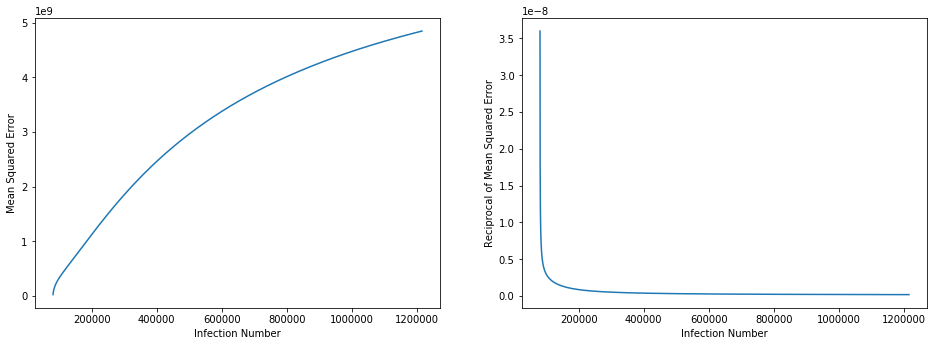

In [6]:
# X = mkX(x)
kL = (y[-1] +1) * np.linspace(1, 15, 10000)
MSEL = []
IMSEL = []

for k in kL:
    lr2 = LinearRegression()
    lr2.fit(x.reshape(-1, 1), np.log(k / y.reshape(-1, 1) - 1 ))

    prd2 = lr2.predict(xx.reshape(-1, 1))
    yy2 = k /(np.e**prd2 +1)
    MSE = mean_squared_error(y.reshape(-1,1), k / (np.e**(lr2.predict(x.reshape(-1,1)))+1 ))

    MSEL.append(MSE)
    IMSEL.append(1/MSE)
    
plt.figure(figsize=(16, 8/1.5))
plt.subplot(1,2,1)
plt.ylabel("Mean Squared Error")
plt.xlabel("Infection Number")
# plt.yscale("log")
plt.plot(kL, MSEL)

plt.subplot(1,2,2)
plt.ylabel("Reciprocal of Mean Squared Error")
plt.xlabel("Infection Number")
# plt.yscale("log")
plt.plot(kL, IMSEL)

plt.show()

In [7]:
minV = min(MSEL)

print(kL[MSEL.index(minV)], kL[MSEL.index(minV) -1 ], kL[MSEL.index(minV) +1] )

k = kL[MSEL.index(minV)]
lr2 = LinearRegression()
lr2.fit(x.reshape(-1, 1), np.log(k / y.reshape(-1, 1) - 1 ))

prd2 = lr2.predict(xx.reshape(-1, 1))
yy2 = k /(np.e**prd2 +1)
MSE = mean_squared_error(y.reshape(-1,1), k / (np.e**(lr2.predict(x.reshape(-1,1)))+1 ))

MSEL.append(MSE)


81055.0 1215825.0 81168.48834883489


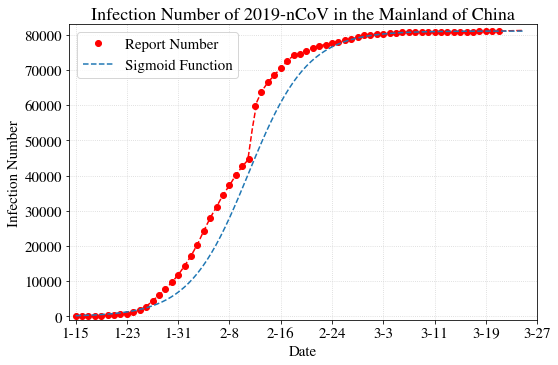

In [13]:
xtk = [0, 8, 16, 24, 32, 40, 48, 56, 64, 72]
xtkshow = ['1-15', '1-23', '1-31', '2-8', '2-16', '2-24', '3-3', '3-11', '3-19', '3-27']

matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

plt.figure(figsize=(8, 8/1.5))
plt.plot(x, y, 'o', label = 'Report Number', c = 'red')
plt.plot(xx, yy,'--', c = 'red')
# plt.plot(xx, yy1,'--', label = 'Exponential Function')
plt.plot(xx, yy2,'--', label = 'Sigmoid Function')

endp = 15
plt.xlim(-1, endp)
plt.xticks(xtk, xtkshow)
plt.xlabel("Date")

# plt.yscale('log')
plt.ylim(-1000, 83000)

plt.ylabel("Infection Number")
plt.title("Infection Number of 2019-nCoV in the Mainland of China")
plt.legend()

plt.grid(linestyle = "dotted", color = "#d3d3d3" , which="both")
plt.tight_layout()
plt.show()

In [11]:
#下一日预测
prd3 = lr2.predict([[len(y)]])
yy3 = k /(np.e**prd3 +1)
yy3

array([[81041.37868851]])

In [12]:
#下一日新增
yy3 - y[-1]

array([[-12.62131149]])